## Model Definition and Model Training (Deep Neural Network)

**This Notebook is for Normalised Dataset**

## Data Description

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|Date |Date of incident	|
|Province/State |If there is a breakdown in states	|
|Lat |Latitude	|
|Lon |Longitude	|
|Confirmed |Confirmed cases	|
|Recovered |Recovered cases	|
|Deaths |Death cases	|
|Active |Active cases	|

## Summary and Results

#### Result

| Algorithm      | MSE | RMSE | R2 |
|----------------|-----|------|----|
|Deep Neural Network | 2.051  | 1.432 | 0.315 |

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
#sets the default autosave frequency in seconds
%autosave 60

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential, save_model
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
# from tensorflow.keras.optimizers import Adam

#For ANN and DNN
import keras
from keras.models import save_model, load_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from keras.optimizers import Adam, Adagrad, RMSprop, SGD
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras.regularizers import l1,l2,l1_l2

#For Tuning
from keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau, TensorBoard


import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)
tf.random.set_seed(0)

Autosaving every 60 seconds


## Data Exploration

In [2]:
df = pd.read_csv("traincovid.csv")

In [3]:
df

,Month,Day,ConfirmDiff,RecoverDiff,DeathsDiff
0,1,22,0.0,0.0,0.0
1,1,23,0.0,0.0,0.0
2,1,24,0.0,0.0,0.0
3,1,25,3.0,0.0,0.0
4,1,26,1.0,0.0,0.0
...,...,...,...,...,...
304,11,21,1041.0,1405.0,3.0
305,11,22,1096.0,1104.0,3.0
306,11,23,1884.0,883.0,2.0
307,11,24,2188.0,1673.0,4.0


In [4]:
df.isnull().sum()

Month          0
Day            0
ConfirmDiff    0
RecoverDiff    0
DeathsDiff     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        309 non-null    int64  
 1   Day          309 non-null    int64  
 2   ConfirmDiff  309 non-null    float64
 3   RecoverDiff  309 non-null    float64
 4   DeathsDiff   309 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 12.2 KB


In [6]:
df.describe(include='all')

,Month,Day,ConfirmDiff,RecoverDiff,DeathsDiff
count,309.000000,309.000000,309.000000,309.000000,309.000000
mean,6.265372,15.857605,193.582524,150.488673,1.116505
std,2.943317,8.814048,359.375952,306.753450,1.988445
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,7.000000,6.000000,0.000000
50%,6.000000,16.000000,33.000000,28.000000,0.000000
75%,9.000000,23.000000,150.000000,96.000000,1.000000
max,11.000000,31.000000,2188.000000,2348.000000,12.000000


In [7]:
df.shape

(309, 5)

In [8]:
df.columns

Index(['Month', 'Day', 'ConfirmDiff', 'RecoverDiff', 'DeathsDiff'], dtype='object')

## Data Visualization

### Univariate Data Exploration

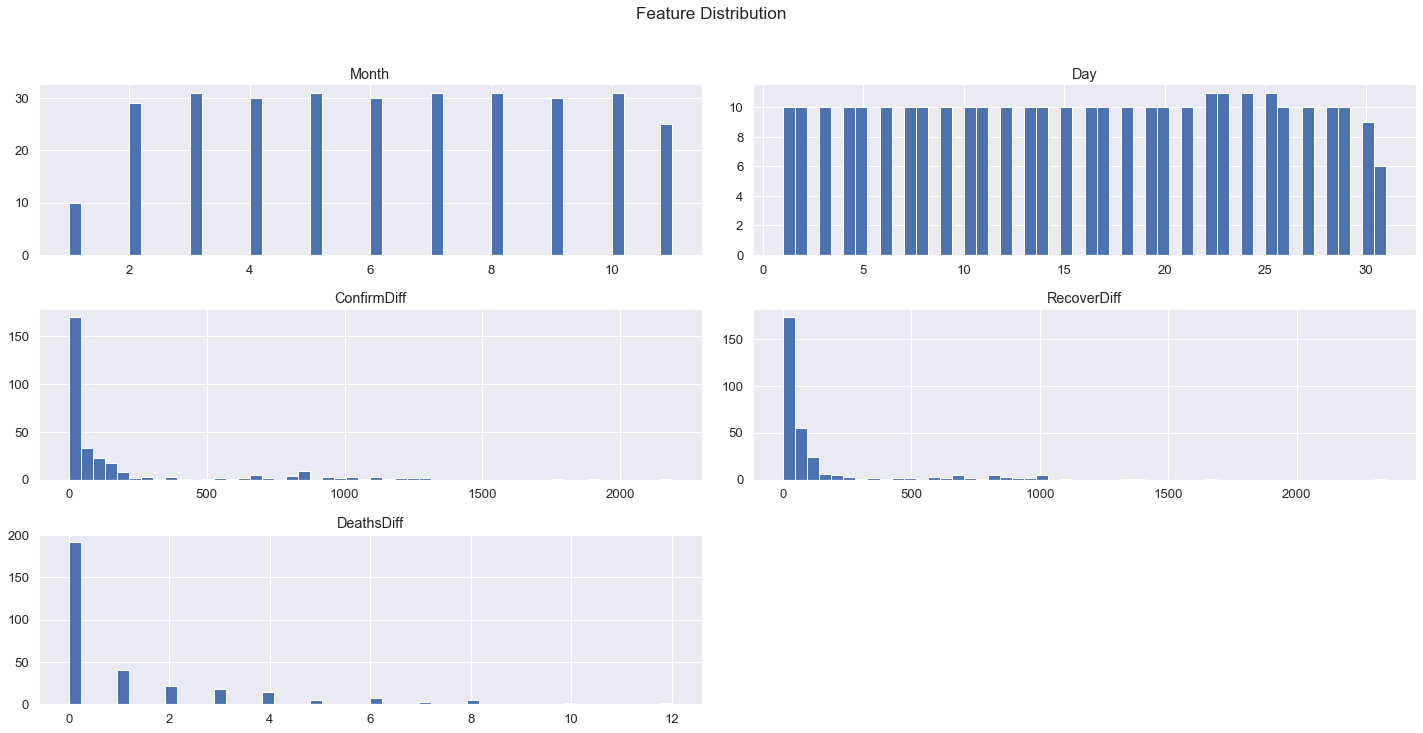

In [9]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

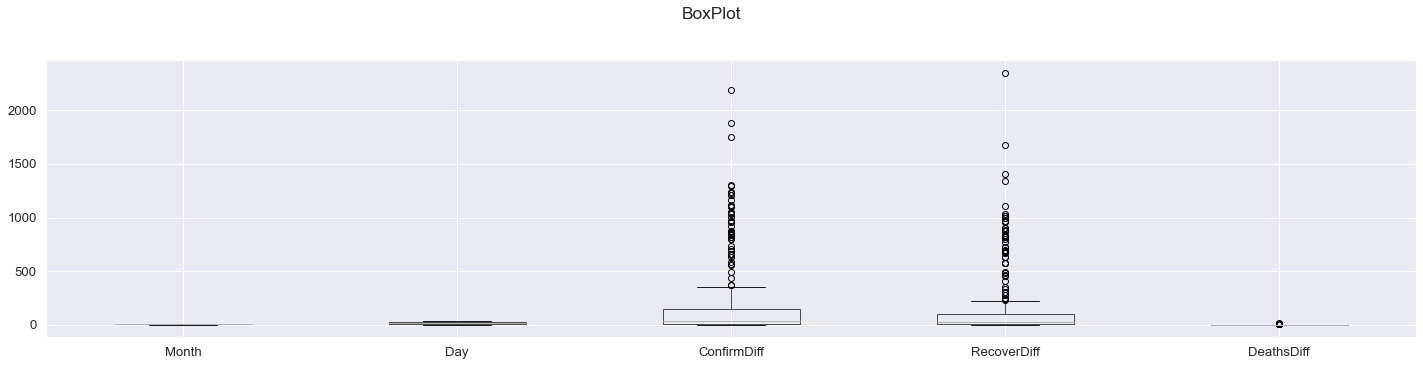

In [10]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

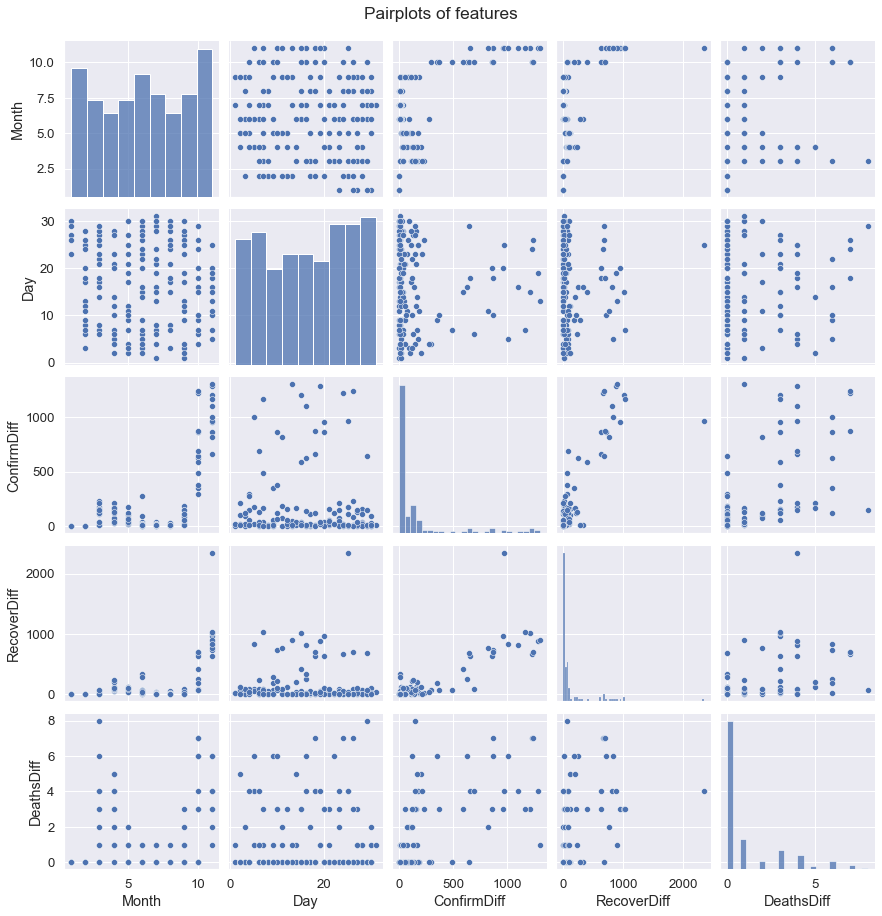

In [11]:
plt.figure(figsize=(20,20))
sns.pairplot(df.sample(150))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### Correlation

In [12]:
df.corr()

,Month,Day,ConfirmDiff,RecoverDiff,DeathsDiff
Month,1.000000,-0.098535,0.604269,0.545945,0.341420
Day,-0.098535,1.000000,0.002108,0.027499,0.035592
ConfirmDiff,0.604269,0.002108,1.000000,0.875959,0.641523
RecoverDiff,0.545945,0.027499,0.875959,1.000000,0.561145
DeathsDiff,0.341420,0.035592,0.641523,0.561145,1.000000


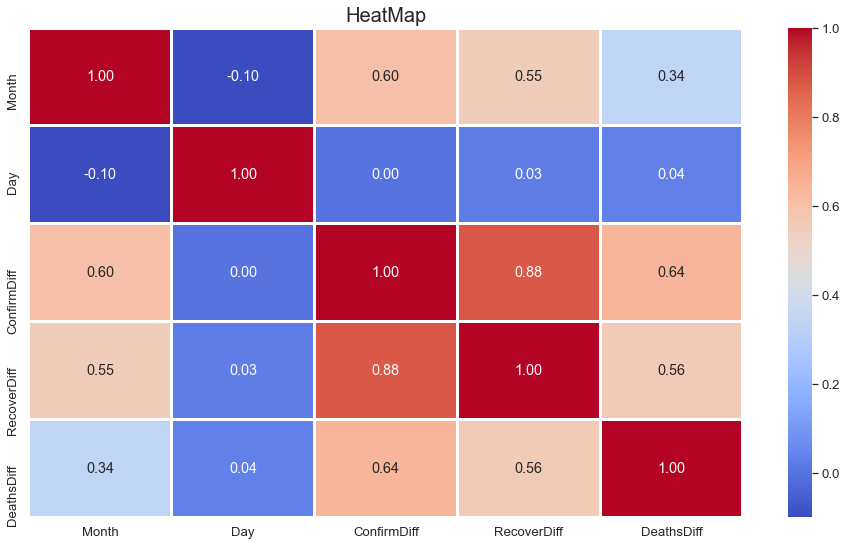

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("HeatMap", fontsize=20)
plt.show()

### Treat Duplicate Values

In [14]:
df.duplicated(keep='first').sum()

0

## Train Test Split

In [15]:
df2 = pd.read_csv("traincovid2.csv")

In [16]:
df2.head()

,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,ConfirmDiff,RecoverDiff,DeathsDiff
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0


In [17]:
df2.shape

(309, 43)

In [18]:
X = df2.iloc[:,0:42]
y = df2.iloc[:,42]

In [19]:
X.values, y.values

(array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ...,    0., 1884.,  883.],
        [   0.,    0.,    0., ...,    0., 2188., 1673.],
        [   0.,    0.,    0., ...,    0.,  970., 2348.]]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  6.,  4.,  2.,  4.,  3.,
         3.,  1.,  8.,  2.,  6.,  2.,  5.,  3.,  4.,  4.,  1.,  1.,  2.,
         2.,  3.,  3.,  3.,  1.,  5.,  1.,  1.,  2.,  2.,  1.,  0.,  3.,
         1.,  2.,  1.,  2.,  0.,  1.,  1.,  0.,  2.,  1.,  0.,  2.,  0.,
         1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  1.,  

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((231, 42), (78, 42), (231,), (78,))

### Feature Scaling (If not using Batch Normalization)

In [22]:
X_train

array([[ 0.,  0.,  0., ...,  0., 39., 74.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  3.,  9.],
       ...,
       [ 0.,  0.,  0., ...,  0., 47., 44.],
       [ 0.,  1.,  0., ...,  0., 18.,  0.],
       [ 0.,  0.,  0., ...,  0., 14.,  4.]])

In [23]:
y_train

array([ 0.,  0.,  0.,  0.,  0.,  3.,  0.,  2.,  0.,  0.,  0.,  3.,  0.,
        0.,  0.,  3.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  2.,  1.,
        0.,  7.,  7.,  0.,  3.,  0.,  3.,  0.,  0.,  0.,  0.,  4.,  0.,
        0.,  0.,  0.,  1.,  3.,  0.,  0.,  5.,  0.,  0.,  1.,  1.,  0.,
        0.,  5.,  0.,  1.,  0.,  6.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  4.,  8.,  7.,  0.,  2.,  8.,  0.,  8.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  2.,  3.,  5.,
        3.,  0.,  0.,  1.,  1.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  5.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  3.,  4.,  0.,  6.,
        0.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  2.,  0.,
        0.,  1.,  0.,  0., 10.,  4.,  0.,  0.,  2.,  0.,  1.,  0.,  1.,
        1.,  2.,  3.,  1.,  5.,  1.,  1.,  4.,  0.,  0.,  0.,  0

In [24]:
minmax = MinMaxScaler()

In [25]:
X_train_scaled = minmax.fit_transform(X_train)

In [26]:
X_test_scaled = minmax.transform(X_test)

In [27]:
X_train_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.0178245 ,
        0.03151618],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00137112,
        0.00383305],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.0214808 ,
        0.01873935],
       [0.        , 1.        , 0.        , ..., 0.        , 0.00822669,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00639854,
        0.00170358]])

In [28]:
X_test_scaled

array([[0.        , 1.        , 0.        , ..., 0.        , 0.0786106 ,
        0.00681431],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01096892,
        0.00298126],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00274223,
        0.00212947],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.58957952,
        0.37393526],
       [0.        , 0.        , 0.        , ..., 0.        , 0.39716636,
        0.30877342],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04798903,
        0.04940375]])

## Model Training

### Using DNN

In [29]:
model = Sequential()
model.add(Dense(units=100,activation='relu',input_dim=42))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(units=100,activation='relu',kernel_regularizer='l2'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(units=1,activation='linear'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4300      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 14,501
Trainable params: 14,501
Non-trainable params: 0
_________________________________________________________________


In [31]:
checkpointcb = keras.callbacks.ModelCheckpoint("BestModelPartB.h5",save_best_only=True)

In [32]:
earlystoppingcb = keras.callbacks.EarlyStopping(patience=10, verbose=1)

In [33]:
optimizer = Adam(learning_rate=0.00001)

In [34]:
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["mse"])

In [35]:
model_history = model.fit(X_train_scaled, y_train,epochs=3000,
                          validation_split=0.2, verbose=2, callbacks=[checkpointcb,earlystoppingcb])

Epoch 1/3000
6/6 - 0s - loss: 6.2281 - mse: 5.2120 - val_loss: 8.5060 - val_mse: 7.4901
Epoch 2/3000
6/6 - 0s - loss: 6.2194 - mse: 5.2037 - val_loss: 8.4975 - val_mse: 7.4820
Epoch 3/3000
6/6 - 0s - loss: 6.2108 - mse: 5.1954 - val_loss: 8.4891 - val_mse: 7.4739
Epoch 4/3000
6/6 - 0s - loss: 6.2035 - mse: 5.1884 - val_loss: 8.4804 - val_mse: 7.4655
Epoch 5/3000
6/6 - 0s - loss: 6.1945 - mse: 5.1797 - val_loss: 8.4720 - val_mse: 7.4575
Epoch 6/3000
6/6 - 0s - loss: 6.1866 - mse: 5.1722 - val_loss: 8.4636 - val_mse: 7.4493
Epoch 7/3000
6/6 - 0s - loss: 6.1779 - mse: 5.1638 - val_loss: 8.4553 - val_mse: 7.4414
Epoch 8/3000
6/6 - 0s - loss: 6.1701 - mse: 5.1563 - val_loss: 8.4468 - val_mse: 7.4333
Epoch 9/3000
6/6 - 0s - loss: 6.1622 - mse: 5.1488 - val_loss: 8.4383 - val_mse: 7.4251
Epoch 10/3000
6/6 - 0s - loss: 6.1539 - mse: 5.1408 - val_loss: 8.4300 - val_mse: 7.4171
Epoch 11/3000
6/6 - 0s - loss: 6.1452 - mse: 5.1325 - val_loss: 8.4221 - val_mse: 7.4095
Epoch 12/3000
6/6 - 0s - loss:

6/6 - 0s - loss: 5.5595 - mse: 4.5739 - val_loss: 7.8099 - val_mse: 6.8246
Epoch 94/3000
6/6 - 0s - loss: 5.5532 - mse: 4.5680 - val_loss: 7.8030 - val_mse: 6.8180
Epoch 95/3000
6/6 - 0s - loss: 5.5469 - mse: 4.5620 - val_loss: 7.7961 - val_mse: 6.8115
Epoch 96/3000
6/6 - 0s - loss: 5.5405 - mse: 4.5559 - val_loss: 7.7893 - val_mse: 6.8050
Epoch 97/3000
6/6 - 0s - loss: 5.5339 - mse: 4.5497 - val_loss: 7.7826 - val_mse: 6.7985
Epoch 98/3000
6/6 - 0s - loss: 5.5272 - mse: 4.5434 - val_loss: 7.7760 - val_mse: 6.7923
Epoch 99/3000
6/6 - 0s - loss: 5.5211 - mse: 4.5375 - val_loss: 7.7692 - val_mse: 6.7858
Epoch 100/3000
6/6 - 0s - loss: 5.5149 - mse: 4.5317 - val_loss: 7.7623 - val_mse: 6.7792
Epoch 101/3000
6/6 - 0s - loss: 5.5083 - mse: 4.5254 - val_loss: 7.7555 - val_mse: 6.7728
Epoch 102/3000
6/6 - 0s - loss: 5.5019 - mse: 4.5193 - val_loss: 7.7487 - val_mse: 6.7664
Epoch 103/3000
6/6 - 0s - loss: 5.4958 - mse: 4.5136 - val_loss: 7.7417 - val_mse: 6.7597
Epoch 104/3000
6/6 - 0s - loss:

Epoch 185/3000
6/6 - 0s - loss: 5.0068 - mse: 4.0516 - val_loss: 7.2002 - val_mse: 6.2451
Epoch 186/3000
6/6 - 0s - loss: 5.0014 - mse: 4.0465 - val_loss: 7.1938 - val_mse: 6.2391
Epoch 187/3000
6/6 - 0s - loss: 4.9956 - mse: 4.0410 - val_loss: 7.1875 - val_mse: 6.2331
Epoch 188/3000
6/6 - 0s - loss: 4.9901 - mse: 4.0358 - val_loss: 7.1813 - val_mse: 6.2272
Epoch 189/3000
6/6 - 0s - loss: 4.9841 - mse: 4.0301 - val_loss: 7.1755 - val_mse: 6.2217
Epoch 190/3000
6/6 - 0s - loss: 4.9785 - mse: 4.0249 - val_loss: 7.1694 - val_mse: 6.2160
Epoch 191/3000
6/6 - 0s - loss: 4.9737 - mse: 4.0204 - val_loss: 7.1629 - val_mse: 6.2098
Epoch 192/3000
6/6 - 0s - loss: 4.9681 - mse: 4.0151 - val_loss: 7.1565 - val_mse: 6.2037
Epoch 193/3000
6/6 - 0s - loss: 4.9621 - mse: 4.0094 - val_loss: 7.1504 - val_mse: 6.1979
Epoch 194/3000
6/6 - 0s - loss: 4.9568 - mse: 4.0045 - val_loss: 7.1443 - val_mse: 6.1921
Epoch 195/3000
6/6 - 0s - loss: 4.9515 - mse: 3.9994 - val_loss: 7.1381 - val_mse: 6.1863
Epoch 196/

6/6 - 0s - loss: 4.5366 - mse: 3.6103 - val_loss: 6.6617 - val_mse: 5.7356
Epoch 277/3000
6/6 - 0s - loss: 4.5315 - mse: 3.6055 - val_loss: 6.6562 - val_mse: 5.7304
Epoch 278/3000
6/6 - 0s - loss: 4.5264 - mse: 3.6008 - val_loss: 6.6510 - val_mse: 5.7255
Epoch 279/3000
6/6 - 0s - loss: 4.5219 - mse: 3.5966 - val_loss: 6.6453 - val_mse: 5.7202
Epoch 280/3000
6/6 - 0s - loss: 4.5170 - mse: 3.5920 - val_loss: 6.6396 - val_mse: 5.7148
Epoch 281/3000
6/6 - 0s - loss: 4.5123 - mse: 3.5876 - val_loss: 6.6339 - val_mse: 5.7094
Epoch 282/3000
6/6 - 0s - loss: 4.5075 - mse: 3.5831 - val_loss: 6.6281 - val_mse: 5.7039
Epoch 283/3000
6/6 - 0s - loss: 4.5029 - mse: 3.5788 - val_loss: 6.6223 - val_mse: 5.6984
Epoch 284/3000
6/6 - 0s - loss: 4.4979 - mse: 3.5741 - val_loss: 6.6167 - val_mse: 5.6931
Epoch 285/3000
6/6 - 0s - loss: 4.4929 - mse: 3.5694 - val_loss: 6.6111 - val_mse: 5.6878
Epoch 286/3000
6/6 - 0s - loss: 4.4880 - mse: 3.5648 - val_loss: 6.6057 - val_mse: 5.6828
Epoch 287/3000
6/6 - 0s -

Epoch 368/3000
6/6 - 0s - loss: 4.1225 - mse: 3.2241 - val_loss: 6.1790 - val_mse: 5.2808
Epoch 369/3000
6/6 - 0s - loss: 4.1179 - mse: 3.2199 - val_loss: 6.1745 - val_mse: 5.2767
Epoch 370/3000
6/6 - 0s - loss: 4.1141 - mse: 3.2164 - val_loss: 6.1696 - val_mse: 5.2720
Epoch 371/3000
6/6 - 0s - loss: 4.1098 - mse: 3.2124 - val_loss: 6.1647 - val_mse: 5.2674
Epoch 372/3000
6/6 - 0s - loss: 4.1058 - mse: 3.2087 - val_loss: 6.1597 - val_mse: 5.2627
Epoch 373/3000
6/6 - 0s - loss: 4.1012 - mse: 3.2044 - val_loss: 6.1551 - val_mse: 5.2584
Epoch 374/3000
6/6 - 0s - loss: 4.0983 - mse: 3.2018 - val_loss: 6.1498 - val_mse: 5.2534
Epoch 375/3000
6/6 - 0s - loss: 4.0935 - mse: 3.1972 - val_loss: 6.1449 - val_mse: 5.2488
Epoch 376/3000
6/6 - 0s - loss: 4.0889 - mse: 3.1929 - val_loss: 6.1403 - val_mse: 5.2445
Epoch 377/3000
6/6 - 0s - loss: 4.0847 - mse: 3.1890 - val_loss: 6.1358 - val_mse: 5.2403
Epoch 378/3000
6/6 - 0s - loss: 4.0811 - mse: 3.1858 - val_loss: 6.1309 - val_mse: 5.2357
Epoch 379/

6/6 - 0s - loss: 3.7656 - mse: 2.8930 - val_loss: 5.7691 - val_mse: 4.8966
Epoch 460/3000
6/6 - 0s - loss: 3.7616 - mse: 2.8892 - val_loss: 5.7651 - val_mse: 4.8929
Epoch 461/3000
6/6 - 0s - loss: 3.7585 - mse: 2.8864 - val_loss: 5.7608 - val_mse: 4.8889
Epoch 462/3000
6/6 - 0s - loss: 3.7544 - mse: 2.8826 - val_loss: 5.7568 - val_mse: 4.8852
Epoch 463/3000
6/6 - 0s - loss: 3.7509 - mse: 2.8793 - val_loss: 5.7527 - val_mse: 4.8813
Epoch 464/3000
6/6 - 0s - loss: 3.7471 - mse: 2.8759 - val_loss: 5.7486 - val_mse: 4.8775
Epoch 465/3000
6/6 - 0s - loss: 3.7435 - mse: 2.8725 - val_loss: 5.7445 - val_mse: 4.8737
Epoch 466/3000
6/6 - 0s - loss: 3.7398 - mse: 2.8690 - val_loss: 5.7404 - val_mse: 4.8698
Epoch 467/3000
6/6 - 0s - loss: 3.7361 - mse: 2.8656 - val_loss: 5.7362 - val_mse: 4.8659
Epoch 468/3000
6/6 - 0s - loss: 3.7329 - mse: 2.8627 - val_loss: 5.7317 - val_mse: 4.8616
Epoch 469/3000
6/6 - 0s - loss: 3.7286 - mse: 2.8587 - val_loss: 5.7276 - val_mse: 4.8579
Epoch 470/3000
6/6 - 0s -

Epoch 551/3000
6/6 - 0s - loss: 3.4431 - mse: 2.5940 - val_loss: 5.3997 - val_mse: 4.5507
Epoch 552/3000
6/6 - 0s - loss: 3.4394 - mse: 2.5905 - val_loss: 5.3962 - val_mse: 4.5474
Epoch 553/3000
6/6 - 0s - loss: 3.4363 - mse: 2.5877 - val_loss: 5.3924 - val_mse: 4.5439
Epoch 554/3000
6/6 - 0s - loss: 3.4329 - mse: 2.5845 - val_loss: 5.3887 - val_mse: 4.5404
Epoch 555/3000
6/6 - 0s - loss: 3.4299 - mse: 2.5817 - val_loss: 5.3846 - val_mse: 4.5366
Epoch 556/3000
6/6 - 0s - loss: 3.4266 - mse: 2.5787 - val_loss: 5.3807 - val_mse: 4.5329
Epoch 557/3000
6/6 - 0s - loss: 3.4230 - mse: 2.5753 - val_loss: 5.3770 - val_mse: 4.5294
Epoch 558/3000
6/6 - 0s - loss: 3.4199 - mse: 2.5724 - val_loss: 5.3731 - val_mse: 4.5258
Epoch 559/3000
6/6 - 0s - loss: 3.4166 - mse: 2.5693 - val_loss: 5.3694 - val_mse: 4.5223
Epoch 560/3000
6/6 - 0s - loss: 3.4132 - mse: 2.5662 - val_loss: 5.3658 - val_mse: 4.5190
Epoch 561/3000
6/6 - 0s - loss: 3.4101 - mse: 2.5633 - val_loss: 5.3620 - val_mse: 4.5154
Epoch 562/

6/6 - 0s - loss: 3.1641 - mse: 2.3359 - val_loss: 5.0732 - val_mse: 4.2451
Epoch 643/3000
6/6 - 0s - loss: 3.1614 - mse: 2.3334 - val_loss: 5.0698 - val_mse: 4.2419
Epoch 644/3000
6/6 - 0s - loss: 3.1586 - mse: 2.3308 - val_loss: 5.0665 - val_mse: 4.2389
Epoch 645/3000
6/6 - 0s - loss: 3.1559 - mse: 2.3283 - val_loss: 5.0630 - val_mse: 4.2355
Epoch 646/3000
6/6 - 0s - loss: 3.1531 - mse: 2.3257 - val_loss: 5.0594 - val_mse: 4.2321
Epoch 647/3000
6/6 - 0s - loss: 3.1498 - mse: 2.3227 - val_loss: 5.0562 - val_mse: 4.2291
Epoch 648/3000
6/6 - 0s - loss: 3.1471 - mse: 2.3201 - val_loss: 5.0528 - val_mse: 4.2260
Epoch 649/3000
6/6 - 0s - loss: 3.1446 - mse: 2.3178 - val_loss: 5.0493 - val_mse: 4.2227
Epoch 650/3000
6/6 - 0s - loss: 3.1413 - mse: 2.3148 - val_loss: 5.0462 - val_mse: 4.2198
Epoch 651/3000
6/6 - 0s - loss: 3.1388 - mse: 2.3125 - val_loss: 5.0427 - val_mse: 4.2165
Epoch 652/3000
6/6 - 0s - loss: 3.1357 - mse: 2.3096 - val_loss: 5.0396 - val_mse: 4.2137
Epoch 653/3000
6/6 - 0s -

Epoch 734/3000
6/6 - 0s - loss: 2.9238 - mse: 2.1149 - val_loss: 4.7869 - val_mse: 3.9781
Epoch 735/3000
6/6 - 0s - loss: 2.9216 - mse: 2.1129 - val_loss: 4.7838 - val_mse: 3.9752
Epoch 736/3000
6/6 - 0s - loss: 2.9191 - mse: 2.1106 - val_loss: 4.7811 - val_mse: 3.9727
Epoch 737/3000
6/6 - 0s - loss: 2.9168 - mse: 2.1085 - val_loss: 4.7782 - val_mse: 3.9701
Epoch 738/3000
6/6 - 0s - loss: 2.9142 - mse: 2.1062 - val_loss: 4.7757 - val_mse: 3.9678
Epoch 739/3000
6/6 - 0s - loss: 2.9121 - mse: 2.1042 - val_loss: 4.7728 - val_mse: 3.9651
Epoch 740/3000
6/6 - 0s - loss: 2.9097 - mse: 2.1021 - val_loss: 4.7700 - val_mse: 3.9625
Epoch 741/3000
6/6 - 0s - loss: 2.9072 - mse: 2.0998 - val_loss: 4.7675 - val_mse: 3.9602
Epoch 742/3000
6/6 - 0s - loss: 2.9050 - mse: 2.0977 - val_loss: 4.7648 - val_mse: 3.9577
Epoch 743/3000
6/6 - 0s - loss: 2.9026 - mse: 2.0956 - val_loss: 4.7621 - val_mse: 3.9552
Epoch 744/3000
6/6 - 0s - loss: 2.9004 - mse: 2.0936 - val_loss: 4.7591 - val_mse: 3.9524
Epoch 745/

6/6 - 0s - loss: 2.7328 - mse: 1.9423 - val_loss: 4.5596 - val_mse: 3.7692
Epoch 826/3000
6/6 - 0s - loss: 2.7308 - mse: 1.9404 - val_loss: 4.5575 - val_mse: 3.7672
Epoch 827/3000
6/6 - 0s - loss: 2.7291 - mse: 1.9390 - val_loss: 4.5552 - val_mse: 3.7651
Epoch 828/3000
6/6 - 0s - loss: 2.7271 - mse: 1.9371 - val_loss: 4.5532 - val_mse: 3.7634
Epoch 829/3000
6/6 - 0s - loss: 2.7253 - mse: 1.9356 - val_loss: 4.5510 - val_mse: 3.7614
Epoch 830/3000
6/6 - 0s - loss: 2.7235 - mse: 1.9340 - val_loss: 4.5488 - val_mse: 3.7593
Epoch 831/3000
6/6 - 0s - loss: 2.7216 - mse: 1.9323 - val_loss: 4.5465 - val_mse: 3.7573
Epoch 832/3000
6/6 - 0s - loss: 2.7199 - mse: 1.9308 - val_loss: 4.5443 - val_mse: 3.7552
Epoch 833/3000
6/6 - 0s - loss: 2.7180 - mse: 1.9290 - val_loss: 4.5422 - val_mse: 3.7533
Epoch 834/3000
6/6 - 0s - loss: 2.7161 - mse: 1.9274 - val_loss: 4.5402 - val_mse: 3.7516
Epoch 835/3000
6/6 - 0s - loss: 2.7145 - mse: 1.9260 - val_loss: 4.5379 - val_mse: 3.7494
Epoch 836/3000
6/6 - 0s -

Epoch 917/3000
6/6 - 0s - loss: 2.5807 - mse: 1.8085 - val_loss: 4.3837 - val_mse: 3.6117
Epoch 918/3000
6/6 - 0s - loss: 2.5792 - mse: 1.8072 - val_loss: 4.3823 - val_mse: 3.6104
Epoch 919/3000
6/6 - 0s - loss: 2.5778 - mse: 1.8060 - val_loss: 4.3807 - val_mse: 3.6091
Epoch 920/3000
6/6 - 0s - loss: 2.5763 - mse: 1.8047 - val_loss: 4.3792 - val_mse: 3.6077
Epoch 921/3000
6/6 - 0s - loss: 2.5749 - mse: 1.8035 - val_loss: 4.3775 - val_mse: 3.6062
Epoch 922/3000
6/6 - 0s - loss: 2.5735 - mse: 1.8023 - val_loss: 4.3758 - val_mse: 3.6047
Epoch 923/3000
6/6 - 0s - loss: 2.5719 - mse: 1.8008 - val_loss: 4.3742 - val_mse: 3.6033
Epoch 924/3000
6/6 - 0s - loss: 2.5705 - mse: 1.7997 - val_loss: 4.3726 - val_mse: 3.6020
Epoch 925/3000
6/6 - 0s - loss: 2.5689 - mse: 1.7983 - val_loss: 4.3710 - val_mse: 3.6005
Epoch 926/3000
6/6 - 0s - loss: 2.5675 - mse: 1.7971 - val_loss: 4.3693 - val_mse: 3.5990
Epoch 927/3000
6/6 - 0s - loss: 2.5661 - mse: 1.7959 - val_loss: 4.3677 - val_mse: 3.5976
Epoch 928/

Epoch 1008/3000
6/6 - 0s - loss: 2.4613 - mse: 1.7071 - val_loss: 4.2584 - val_mse: 3.5044
Epoch 1009/3000
6/6 - 0s - loss: 2.4601 - mse: 1.7061 - val_loss: 4.2574 - val_mse: 3.5036
Epoch 1010/3000
6/6 - 0s - loss: 2.4588 - mse: 1.7051 - val_loss: 4.2564 - val_mse: 3.5028
Epoch 1011/3000
6/6 - 0s - loss: 2.4578 - mse: 1.7043 - val_loss: 4.2551 - val_mse: 3.5016
Epoch 1012/3000
6/6 - 0s - loss: 2.4565 - mse: 1.7032 - val_loss: 4.2540 - val_mse: 3.5008
Epoch 1013/3000
6/6 - 0s - loss: 2.4555 - mse: 1.7023 - val_loss: 4.2527 - val_mse: 3.4997
Epoch 1014/3000
6/6 - 0s - loss: 2.4541 - mse: 1.7012 - val_loss: 4.2519 - val_mse: 3.4990
Epoch 1015/3000
6/6 - 0s - loss: 2.4531 - mse: 1.7004 - val_loss: 4.2507 - val_mse: 3.4981
Epoch 1016/3000
6/6 - 0s - loss: 2.4520 - mse: 1.6995 - val_loss: 4.2495 - val_mse: 3.4971
Epoch 1017/3000
6/6 - 0s - loss: 2.4507 - mse: 1.6983 - val_loss: 4.2484 - val_mse: 3.4962
Epoch 1018/3000
6/6 - 0s - loss: 2.4496 - mse: 1.6975 - val_loss: 4.2472 - val_mse: 3.4952

6/6 - 0s - loss: 2.3654 - mse: 1.6291 - val_loss: 4.1741 - val_mse: 3.4380
Epoch 1099/3000
6/6 - 0s - loss: 2.3643 - mse: 1.6283 - val_loss: 4.1731 - val_mse: 3.4372
Epoch 1100/3000
6/6 - 0s - loss: 2.3632 - mse: 1.6274 - val_loss: 4.1725 - val_mse: 3.4368
Epoch 1101/3000
6/6 - 0s - loss: 2.3623 - mse: 1.6266 - val_loss: 4.1716 - val_mse: 3.4361
Epoch 1102/3000
6/6 - 0s - loss: 2.3616 - mse: 1.6262 - val_loss: 4.1706 - val_mse: 3.4353
Epoch 1103/3000
6/6 - 0s - loss: 2.3603 - mse: 1.6250 - val_loss: 4.1699 - val_mse: 3.4347
Epoch 1104/3000
6/6 - 0s - loss: 2.3593 - mse: 1.6243 - val_loss: 4.1692 - val_mse: 3.4342
Epoch 1105/3000
6/6 - 0s - loss: 2.3583 - mse: 1.6235 - val_loss: 4.1686 - val_mse: 3.4338
Epoch 1106/3000
6/6 - 0s - loss: 2.3574 - mse: 1.6228 - val_loss: 4.1679 - val_mse: 3.4334
Epoch 1107/3000
6/6 - 0s - loss: 2.3565 - mse: 1.6220 - val_loss: 4.1673 - val_mse: 3.4330
Epoch 1108/3000
6/6 - 0s - loss: 2.3555 - mse: 1.6212 - val_loss: 4.1666 - val_mse: 3.4325
Epoch 1109/3000

Epoch 1189/3000
6/6 - 0s - loss: 2.2816 - mse: 1.5632 - val_loss: 4.1185 - val_mse: 3.4002
Epoch 1190/3000
6/6 - 0s - loss: 2.2805 - mse: 1.5623 - val_loss: 4.1182 - val_mse: 3.4002
Epoch 1191/3000
6/6 - 0s - loss: 2.2796 - mse: 1.5616 - val_loss: 4.1176 - val_mse: 3.3998
Epoch 1192/3000
6/6 - 0s - loss: 2.2788 - mse: 1.5610 - val_loss: 4.1170 - val_mse: 3.3994
Epoch 1193/3000
6/6 - 0s - loss: 2.2778 - mse: 1.5602 - val_loss: 4.1168 - val_mse: 3.3993
Epoch 1194/3000
6/6 - 0s - loss: 2.2772 - mse: 1.5598 - val_loss: 4.1158 - val_mse: 3.3985
Epoch 1195/3000
6/6 - 0s - loss: 2.2760 - mse: 1.5588 - val_loss: 4.1154 - val_mse: 3.3983
Epoch 1196/3000
6/6 - 0s - loss: 2.2753 - mse: 1.5583 - val_loss: 4.1151 - val_mse: 3.3982
Epoch 1197/3000
6/6 - 0s - loss: 2.2745 - mse: 1.5576 - val_loss: 4.1146 - val_mse: 3.3979
Epoch 1198/3000
6/6 - 0s - loss: 2.2735 - mse: 1.5569 - val_loss: 4.1143 - val_mse: 3.3977
Epoch 1199/3000
6/6 - 0s - loss: 2.2727 - mse: 1.5563 - val_loss: 4.1140 - val_mse: 3.3977

Epoch 1280/3000
6/6 - 0s - loss: 2.2052 - mse: 1.5040 - val_loss: 4.0798 - val_mse: 3.3788
Epoch 1281/3000
6/6 - 0s - loss: 2.2044 - mse: 1.5034 - val_loss: 4.0796 - val_mse: 3.3788
Epoch 1282/3000
6/6 - 0s - loss: 2.2036 - mse: 1.5029 - val_loss: 4.0792 - val_mse: 3.3786
Epoch 1283/3000
6/6 - 0s - loss: 2.2029 - mse: 1.5024 - val_loss: 4.0785 - val_mse: 3.3781
Epoch 1284/3000
6/6 - 0s - loss: 2.2020 - mse: 1.5016 - val_loss: 4.0785 - val_mse: 3.3783
Epoch 1285/3000
6/6 - 0s - loss: 2.2012 - mse: 1.5010 - val_loss: 4.0783 - val_mse: 3.3782
Epoch 1286/3000
6/6 - 0s - loss: 2.2006 - mse: 1.5006 - val_loss: 4.0777 - val_mse: 3.3778
Epoch 1287/3000
6/6 - 0s - loss: 2.1996 - mse: 1.4997 - val_loss: 4.0777 - val_mse: 3.3780
Epoch 1288/3000
6/6 - 0s - loss: 2.1988 - mse: 1.4992 - val_loss: 4.0775 - val_mse: 3.3780
Epoch 1289/3000
6/6 - 0s - loss: 2.1982 - mse: 1.4988 - val_loss: 4.0769 - val_mse: 3.3775
Epoch 1290/3000
6/6 - 0s - loss: 2.1973 - mse: 1.4980 - val_loss: 4.0765 - val_mse: 3.3773

6/6 - 0s - loss: 2.1354 - mse: 1.4505 - val_loss: 4.0534 - val_mse: 3.3686
Epoch 1371/3000
6/6 - 0s - loss: 2.1346 - mse: 1.4499 - val_loss: 4.0532 - val_mse: 3.3686
Epoch 1372/3000
6/6 - 0s - loss: 2.1341 - mse: 1.4495 - val_loss: 4.0531 - val_mse: 3.3686
Epoch 1373/3000
6/6 - 0s - loss: 2.1332 - mse: 1.4488 - val_loss: 4.0528 - val_mse: 3.3685
Epoch 1374/3000
6/6 - 0s - loss: 2.1325 - mse: 1.4482 - val_loss: 4.0525 - val_mse: 3.3684
Epoch 1375/3000
6/6 - 0s - loss: 2.1317 - mse: 1.4476 - val_loss: 4.0522 - val_mse: 3.3682
Epoch 1376/3000
6/6 - 0s - loss: 2.1310 - mse: 1.4471 - val_loss: 4.0517 - val_mse: 3.3679
Epoch 1377/3000
6/6 - 0s - loss: 2.1302 - mse: 1.4464 - val_loss: 4.0515 - val_mse: 3.3679
Epoch 1378/3000
6/6 - 0s - loss: 2.1294 - mse: 1.4458 - val_loss: 4.0513 - val_mse: 3.3678
Epoch 1379/3000
6/6 - 0s - loss: 2.1286 - mse: 1.4453 - val_loss: 4.0512 - val_mse: 3.3679
Epoch 1380/3000
6/6 - 0s - loss: 2.1279 - mse: 1.4447 - val_loss: 4.0509 - val_mse: 3.3678
Epoch 1381/3000

Epoch 1461/3000
6/6 - 0s - loss: 2.0688 - mse: 1.3993 - val_loss: 4.0344 - val_mse: 3.3649
Epoch 1462/3000
6/6 - 0s - loss: 2.0683 - mse: 1.3989 - val_loss: 4.0340 - val_mse: 3.3647
Epoch 1463/3000
6/6 - 0s - loss: 2.0674 - mse: 1.3982 - val_loss: 4.0340 - val_mse: 3.3649
Epoch 1464/3000
6/6 - 0s - loss: 2.0667 - mse: 1.3976 - val_loss: 4.0339 - val_mse: 3.3650
Epoch 1465/3000
6/6 - 0s - loss: 2.0661 - mse: 1.3972 - val_loss: 4.0336 - val_mse: 3.3649
Epoch 1466/3000
6/6 - 0s - loss: 2.0652 - mse: 1.3965 - val_loss: 4.0335 - val_mse: 3.3649
Epoch 1467/3000
6/6 - 0s - loss: 2.0645 - mse: 1.3960 - val_loss: 4.0333 - val_mse: 3.3649
Epoch 1468/3000
6/6 - 0s - loss: 2.0639 - mse: 1.3955 - val_loss: 4.0332 - val_mse: 3.3650
Epoch 1469/3000
6/6 - 0s - loss: 2.0631 - mse: 1.3949 - val_loss: 4.0330 - val_mse: 3.3648
Epoch 1470/3000
6/6 - 0s - loss: 2.0624 - mse: 1.3943 - val_loss: 4.0330 - val_mse: 3.3650
Epoch 1471/3000
6/6 - 0s - loss: 2.0618 - mse: 1.3939 - val_loss: 4.0327 - val_mse: 3.3649

6/6 - 0s - loss: 2.0054 - mse: 1.3501 - val_loss: 4.0217 - val_mse: 3.3665
Epoch 1552/3000
6/6 - 0s - loss: 2.0047 - mse: 1.3496 - val_loss: 4.0215 - val_mse: 3.3665
Epoch 1553/3000
6/6 - 0s - loss: 2.0040 - mse: 1.3490 - val_loss: 4.0214 - val_mse: 3.3666
Epoch 1554/3000
6/6 - 0s - loss: 2.0034 - mse: 1.3486 - val_loss: 4.0212 - val_mse: 3.3665
Epoch 1555/3000
6/6 - 0s - loss: 2.0026 - mse: 1.3479 - val_loss: 4.0212 - val_mse: 3.3667
Epoch 1556/3000
6/6 - 0s - loss: 2.0019 - mse: 1.3474 - val_loss: 4.0212 - val_mse: 3.3668
Epoch 1557/3000
6/6 - 0s - loss: 2.0012 - mse: 1.3468 - val_loss: 4.0210 - val_mse: 3.3667
Epoch 1558/3000
6/6 - 0s - loss: 2.0007 - mse: 1.3465 - val_loss: 4.0208 - val_mse: 3.3667
Epoch 1559/3000
6/6 - 0s - loss: 1.9998 - mse: 1.3458 - val_loss: 4.0208 - val_mse: 3.3669
Epoch 1560/3000
6/6 - 0s - loss: 1.9991 - mse: 1.3452 - val_loss: 4.0206 - val_mse: 3.3669
Epoch 1561/3000
6/6 - 0s - loss: 1.9985 - mse: 1.3448 - val_loss: 4.0206 - val_mse: 3.3669
Epoch 1562/3000

Epoch 1642/3000
6/6 - 0s - loss: 1.9437 - mse: 1.3019 - val_loss: 4.0129 - val_mse: 3.3712
Epoch 1643/3000
6/6 - 0s - loss: 1.9431 - mse: 1.3015 - val_loss: 4.0130 - val_mse: 3.3714
Epoch 1644/3000
6/6 - 0s - loss: 1.9425 - mse: 1.3010 - val_loss: 4.0127 - val_mse: 3.3713
Epoch 1645/3000
6/6 - 0s - loss: 1.9417 - mse: 1.3004 - val_loss: 4.0125 - val_mse: 3.3713
Epoch 1646/3000
6/6 - 0s - loss: 1.9410 - mse: 1.2998 - val_loss: 4.0125 - val_mse: 3.3714
Epoch 1647/3000
6/6 - 0s - loss: 1.9403 - mse: 1.2993 - val_loss: 4.0122 - val_mse: 3.3712
Epoch 1648/3000
6/6 - 0s - loss: 1.9398 - mse: 1.2989 - val_loss: 4.0118 - val_mse: 3.3709
Epoch 1649/3000
6/6 - 0s - loss: 1.9390 - mse: 1.2982 - val_loss: 4.0117 - val_mse: 3.3711
Epoch 1650/3000
6/6 - 0s - loss: 1.9383 - mse: 1.2977 - val_loss: 4.0117 - val_mse: 3.3712
Epoch 1651/3000
6/6 - 0s - loss: 1.9377 - mse: 1.2972 - val_loss: 4.0117 - val_mse: 3.3713
Epoch 1652/3000
6/6 - 0s - loss: 1.9370 - mse: 1.2967 - val_loss: 4.0118 - val_mse: 3.3715

Epoch 1733/3000
6/6 - 0s - loss: 1.8836 - mse: 1.2545 - val_loss: 4.0039 - val_mse: 3.3749
Epoch 1734/3000
6/6 - 0s - loss: 1.8830 - mse: 1.2540 - val_loss: 4.0038 - val_mse: 3.3749
Epoch 1735/3000
6/6 - 0s - loss: 1.8823 - mse: 1.2534 - val_loss: 4.0037 - val_mse: 3.3750
Epoch 1736/3000
6/6 - 0s - loss: 1.8816 - mse: 1.2529 - val_loss: 4.0036 - val_mse: 3.3750
Epoch 1737/3000
6/6 - 0s - loss: 1.8810 - mse: 1.2524 - val_loss: 4.0035 - val_mse: 3.3751
Epoch 1738/3000
6/6 - 0s - loss: 1.8803 - mse: 1.2519 - val_loss: 4.0034 - val_mse: 3.3751
Epoch 1739/3000
6/6 - 0s - loss: 1.8798 - mse: 1.2515 - val_loss: 4.0032 - val_mse: 3.3750
Epoch 1740/3000
6/6 - 0s - loss: 1.8790 - mse: 1.2508 - val_loss: 4.0031 - val_mse: 3.3750
Epoch 1741/3000
6/6 - 0s - loss: 1.8784 - mse: 1.2504 - val_loss: 4.0033 - val_mse: 3.3753
Epoch 1742/3000
6/6 - 0s - loss: 1.8777 - mse: 1.2498 - val_loss: 4.0030 - val_mse: 3.3752
Epoch 1743/3000
6/6 - 0s - loss: 1.8771 - mse: 1.2493 - val_loss: 4.0030 - val_mse: 3.3753

Epoch 1824/3000
6/6 - 0s - loss: 1.8250 - mse: 1.2078 - val_loss: 3.9983 - val_mse: 3.3811
Epoch 1825/3000
6/6 - 0s - loss: 1.8243 - mse: 1.2072 - val_loss: 3.9982 - val_mse: 3.3811
Epoch 1826/3000
6/6 - 0s - loss: 1.8237 - mse: 1.2067 - val_loss: 3.9982 - val_mse: 3.3813
Epoch 1827/3000
6/6 - 0s - loss: 1.8231 - mse: 1.2062 - val_loss: 3.9979 - val_mse: 3.3811
Epoch 1828/3000
6/6 - 0s - loss: 1.8225 - mse: 1.2057 - val_loss: 3.9980 - val_mse: 3.3813
Epoch 1829/3000
6/6 - 0s - loss: 1.8218 - mse: 1.2051 - val_loss: 3.9978 - val_mse: 3.3813
Epoch 1830/3000
6/6 - 0s - loss: 1.8212 - mse: 1.2047 - val_loss: 3.9975 - val_mse: 3.3811
Epoch 1831/3000
6/6 - 0s - loss: 1.8205 - mse: 1.2041 - val_loss: 3.9974 - val_mse: 3.3811
Epoch 1832/3000
6/6 - 0s - loss: 1.8199 - mse: 1.2036 - val_loss: 3.9976 - val_mse: 3.3814
Epoch 1833/3000
6/6 - 0s - loss: 1.8193 - mse: 1.2031 - val_loss: 3.9977 - val_mse: 3.3816
Epoch 1834/3000
6/6 - 0s - loss: 1.8186 - mse: 1.2026 - val_loss: 3.9975 - val_mse: 3.3815

6/6 - 0s - loss: 1.7682 - mse: 1.1617 - val_loss: 3.9945 - val_mse: 3.3881
Epoch 1915/3000
6/6 - 0s - loss: 1.7675 - mse: 1.1612 - val_loss: 3.9945 - val_mse: 3.3882
Epoch 1916/3000
6/6 - 0s - loss: 1.7670 - mse: 1.1607 - val_loss: 3.9947 - val_mse: 3.3885
Epoch 1917/3000
6/6 - 0s - loss: 1.7662 - mse: 1.1601 - val_loss: 3.9947 - val_mse: 3.3887
Epoch 1918/3000
6/6 - 0s - loss: 1.7656 - mse: 1.1596 - val_loss: 3.9947 - val_mse: 3.3887
Epoch 1919/3000
6/6 - 0s - loss: 1.7650 - mse: 1.1591 - val_loss: 3.9947 - val_mse: 3.3888
Epoch 1920/3000
6/6 - 0s - loss: 1.7645 - mse: 1.1588 - val_loss: 3.9948 - val_mse: 3.3891
Epoch 1921/3000
6/6 - 0s - loss: 1.7638 - mse: 1.1581 - val_loss: 3.9948 - val_mse: 3.3892
Epoch 1922/3000
6/6 - 0s - loss: 1.7632 - mse: 1.1577 - val_loss: 3.9948 - val_mse: 3.3893
Epoch 1923/3000
6/6 - 0s - loss: 1.7625 - mse: 1.1571 - val_loss: 3.9945 - val_mse: 3.3891
Epoch 1924/3000
6/6 - 0s - loss: 1.7619 - mse: 1.1566 - val_loss: 3.9943 - val_mse: 3.3891
Epoch 1925/3000

Epoch 2005/3000
6/6 - 0s - loss: 1.7121 - mse: 1.1157 - val_loss: 3.9926 - val_mse: 3.3963
Epoch 2006/3000
6/6 - 0s - loss: 1.7114 - mse: 1.1152 - val_loss: 3.9923 - val_mse: 3.3961
Epoch 2007/3000
6/6 - 0s - loss: 1.7108 - mse: 1.1146 - val_loss: 3.9923 - val_mse: 3.3962
Epoch 2008/3000
6/6 - 0s - loss: 1.7102 - mse: 1.1142 - val_loss: 3.9922 - val_mse: 3.3962
Epoch 2009/3000
6/6 - 0s - loss: 1.7096 - mse: 1.1136 - val_loss: 3.9921 - val_mse: 3.3962
Epoch 2010/3000
6/6 - 0s - loss: 1.7089 - mse: 1.1131 - val_loss: 3.9921 - val_mse: 3.3964
Epoch 2011/3000
6/6 - 0s - loss: 1.7083 - mse: 1.1126 - val_loss: 3.9922 - val_mse: 3.3966
Epoch 2012/3000
6/6 - 0s - loss: 1.7079 - mse: 1.1122 - val_loss: 3.9921 - val_mse: 3.3966
Epoch 2013/3000
6/6 - 0s - loss: 1.7072 - mse: 1.1117 - val_loss: 3.9924 - val_mse: 3.3969
Epoch 2014/3000
6/6 - 0s - loss: 1.7065 - mse: 1.1111 - val_loss: 3.9925 - val_mse: 3.3971
Epoch 2015/3000
6/6 - 0s - loss: 1.7059 - mse: 1.1106 - val_loss: 3.9925 - val_mse: 3.3973

In [36]:
model_history.params

{'verbose': 2, 'epochs': 3000, 'steps': 6}

In [37]:
model_history.history

{'loss': [6.228052616119385,
  6.219393730163574,
  6.210800647735596,
  6.203500270843506,
  6.194483757019043,
  6.1865763664245605,
  6.177905082702637,
  6.1700663566589355,
  6.16220235824585,
  6.153896331787109,
  6.1452412605285645,
  6.13754940032959,
  6.12999153137207,
  6.121374607086182,
  6.113555908203125,
  6.105292320251465,
  6.0976881980896,
  6.089517116546631,
  6.081488132476807,
  6.073548793792725,
  6.0656418800354,
  6.058452606201172,
  6.0502848625183105,
  6.042501926422119,
  6.034907341003418,
  6.027019500732422,
  6.019712448120117,
  6.011867523193359,
  6.004425048828125,
  5.996707916259766,
  5.989092826843262,
  5.981525421142578,
  5.974216461181641,
  5.966842174530029,
  5.95950984954834,
  5.9515790939331055,
  5.944617748260498,
  5.937183380126953,
  5.929556846618652,
  5.922434329986572,
  5.915176868438721,
  5.907642364501953,
  5.900478363037109,
  5.89304256439209,
  5.886322021484375,
  5.878470420837402,
  5.871436595916748,
  5.86433

In [38]:
hist = pd.DataFrame(model_history.history)
hist

,loss,mse,val_loss,val_mse
0,6.228053,5.212002,8.505991,7.490143
1,6.219394,5.203680,8.497508,7.481991
2,6.210801,5.195415,8.489076,7.473888
3,6.203500,5.188440,8.480375,7.465508
4,6.194484,5.179749,8.472036,7.457499
...,...,...,...,...
2014,1.705927,1.110648,3.992495,3.397284
2015,1.705299,1.110135,3.992620,3.397521
2016,1.704737,1.109681,3.992536,3.397540
2017,1.704114,1.109159,3.992657,3.397762


In [39]:
hist['epoch'] = model_history.epoch

In [40]:
hist

,loss,mse,val_loss,val_mse,epoch
0,6.228053,5.212002,8.505991,7.490143,0
1,6.219394,5.203680,8.497508,7.481991,1
2,6.210801,5.195415,8.489076,7.473888,2
3,6.203500,5.188440,8.480375,7.465508,3
4,6.194484,5.179749,8.472036,7.457499,4
...,...,...,...,...,...
2014,1.705927,1.110648,3.992495,3.397284,2014
2015,1.705299,1.110135,3.992620,3.397521,2015
2016,1.704737,1.109681,3.992536,3.397540,2016
2017,1.704114,1.109159,3.992657,3.397762,2017


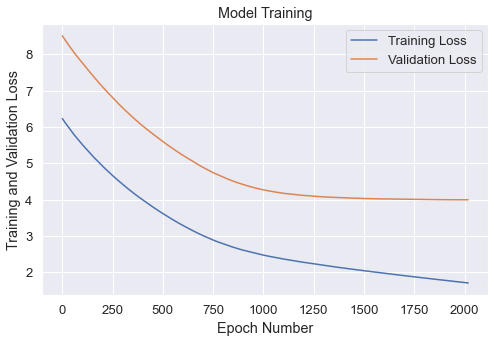

In [41]:
plt.figure(figsize=(8,5))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Training")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

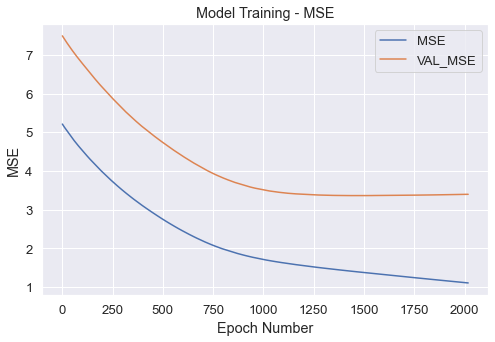

In [42]:
plt.figure(figsize=(8,5))
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title("Model Training - MSE")
plt.ylabel("MSE")
plt.xlabel("Epoch Number")
plt.legend(['MSE','VAL_MSE'])
plt.show()

### Model Evaluation

In [43]:
model.get_weights()

[array([[-0.05297512, -0.12366547,  0.07736905, ..., -0.09062039,
          0.06347909, -0.20646802],
        [ 0.07098177,  0.03261359, -0.15519755, ...,  0.05719507,
         -0.15749949, -0.10113611],
        [ 0.04887106,  0.00890229,  0.0305215 , ..., -0.03756858,
          0.22047883,  0.05023079],
        ...,
        [ 0.00669095,  0.08665477,  0.21863142, ...,  0.11498241,
         -0.22320448, -0.02883197],
        [ 0.07771438, -0.00941532,  0.1424937 , ...,  0.15572394,
          0.01894218,  0.06721682],
        [-0.18693943,  0.13739987, -0.16098392, ...,  0.17147072,
          0.15384378, -0.0786418 ]], dtype=float32),
 array([ 0.02286501,  0.05595629,  0.00629237,  0.04838721,  0.03751145,
         0.0583783 ,  0.00977572,  0.00928267,  0.03593256,  0.03126948,
         0.0205111 , -0.00657973,  0.04227478,  0.02382563,  0.01991147,
         0.02659311,  0.02421512,  0.01672214,  0.03921797,  0.01986597,
         0.0157018 ,  0.02551727,  0.02921482,  0.02828117, -0.033

In [44]:
test_loss, test_mse = model.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 0s 998us/step - loss: 2.4563 - mse: 1.8615


In [45]:
print("Test MSE: {}".format(test_mse))

Test MSE: 1.8615323305130005


### Model Prediction

In [46]:
y_pred = model.predict(X_test_scaled)

In [47]:
y_pred[0:5]

array([[ 1.2393335 ],
       [-0.07362135],
       [-0.10825673],
       [ 0.4234009 ],
       [ 0.45786145]], dtype=float32)

In [48]:
y_pred.round()[0:5]

array([[ 1.],
       [-0.],
       [-0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [49]:
y_test[0:5]

array([4., 0., 0., 0., 0.])

In [50]:
mse = mean_squared_error(y_test,y_pred.round())
mse

2.051282051282051

In [51]:
rmse = np.sqrt(mse)
rmse

1.4322297480788657

In [52]:
r2 = r2_score(y_test,y_pred.round())
r2

0.31488801054018445

In [53]:
n = len(X_test)
n

78

In [54]:
p = X_test.shape[1]
p

42

In [55]:
#Adjusted R2 Score
adjr2 = 1-(1-r2)*(n-1)/(n-p-1)
adjr2

-0.5072463768115942

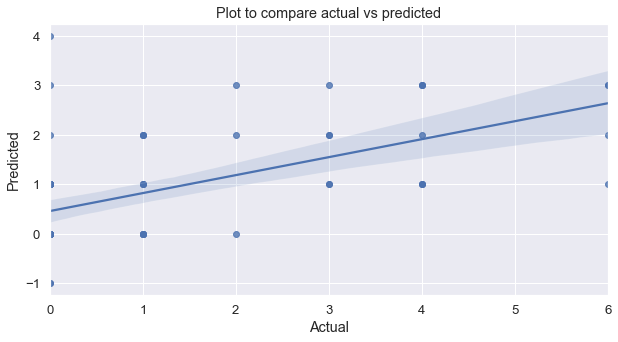

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred.round(), ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Save the Model

In [57]:
model.save("dnnPartB.h5")

### Cross Validation

Build a model (regression or classfier) first

In [58]:
def build_regressor():
    model = Sequential()
    model.add(Dense(units=100,activation='relu',input_dim=42))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))
    model.add(Dense(units=100,activation='relu',kernel_regularizer='l2'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))
    model.add(Dense(units=1,activation='linear'))
    optimizer = Adam(learning_rate=0.00001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["mse"])
    return model

In [59]:
model = KerasRegressor(build_fn=build_regressor, epochs=3000)

In [60]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [61]:
cv = cross_val_score(estimator=model,X=X_train_scaled, y=y_train, cv=kfold, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


In [62]:
cv

array([-4.08172989, -3.07708287, -4.10006762, -2.8819921 , -3.49925804])

In [63]:
cv.mean()

-3.5280261039733887

In [64]:
cv.std()

0.501070195491264

In [65]:
mse_mean = abs(cv.mean())
mse_mean

3.5280261039733887

In [66]:
rmse = np.sqrt(mse_mean)
rmse

1.8783040499273245

### Model Hyperparameter Tuning

### Create a regressor or classifier function

In [ ]:
def build_regressor(optimizer):
    model = Sequential()
    model.add(Dense(units=100,activation='relu',input_dim=42))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))
    model.add(Dense(units=100,activation='relu',kernel_regularizer='l2'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))
    model.add(Dense(units=1,activation='linear'))
    optimizer = Adam(learning_rate=0.00001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["mse"])
    return model

In [ ]:
model = KerasRegressor(build_fn=build_regressor)

In [ ]:
params = {'batch_size':[1,2,5],
          'epochs' : [100,200,300],
          'optimizer' : ['Adam', 'RMSprop', 'SGD']
         }

### Use RandomSearch CV

In [ ]:
randomsearch = RandomizedSearchCV(estimator=model, param_distributions=params,n_iter=10,
                                  scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,random_state=0)

In [ ]:
randomsearchcv = randomsearch.fit(X_train, y_train)

In [ ]:
randomsearchcv.best_params_

In [ ]:
randomsearchcv.best_score_

### Final Model

In [ ]:
model2 = Sequential()
model2.add(Dense(units=100,activation='relu',input_dim=42))
#model2.add(BatchNormalization())
#model2.add(Dropout(0.2))
model2.add(Dense(units=100,activation='relu',kernel_regularizer='l2'))
#model2.add(BatchNormalization())
#model2.add(Dropout(0.2))
model2.add(Dense(units=1,activation='linear'))

In [ ]:
model2.summary()

In [ ]:
checkpointcb = keras.callbacks.ModelCheckpoint("BestModelPartA.h5",save_best_only=True)

In [ ]:
earlystoppingcb = keras.callbacks.EarlyStopping(patience=10, verbose=1)

In [ ]:
optimizer = SGD(learning_rate=0.0001)

In [ ]:
model2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["mse"])

In [ ]:
model_history_2 = model2.fit(X_train, y_train,epochs=200,batch_size=2,
                          validation_split=0.2, verbose=2, callbacks=[checkpointcb,earlystoppingcb])

In [ ]:
model_history_2.params